## **Data Analysis Project - BLINK IT**

### **Importing required liabraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### **Loading data**

In [2]:
df = pd.read_csv('blinkit_data.csv')

### **Sample data**

In [3]:
df.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


In [4]:
df.tail()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
8518,low fat,NCT53,Health and Hygiene,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,164.5526,4.0
8519,low fat,FDN09,Snack Foods,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.034706,NaN,241.6828,4.0
8520,low fat,DRE13,Soft Drinks,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.027571,NaN,86.6198,4.0
8521,reg,FDT50,Dairy,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.107715,NaN,97.8752,4.0
8522,reg,FDM58,Snack Foods,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,112.2544,4.0


### **Size of data**

In [5]:
print('Size of data:',df.shape)

Size of data: (8523, 12)


### **Field information**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item Fat Content           8523 non-null   object 
 1   Item Identifier            8523 non-null   object 
 2   Item Type                  8523 non-null   object 
 3   Outlet Establishment Year  8523 non-null   int64  
 4   Outlet Identifier          8523 non-null   object 
 5   Outlet Location Type       8523 non-null   object 
 6   Outlet Size                8523 non-null   object 
 7   Outlet Type                8523 non-null   object 
 8   Item Visibility            8523 non-null   float64
 9   Item Weight                7060 non-null   float64
 10  Sales                      8523 non-null   float64
 11  Rating                     8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

### **Field data types**

In [8]:
df.dtypes

Item Fat Content              object
Item Identifier               object
Item Type                     object
Outlet Establishment Year      int64
Outlet Identifier             object
Outlet Location Type          object
Outlet Size                   object
Outlet Type                   object
Item Visibility              float64
Item Weight                  float64
Sales                        float64
Rating                       float64
dtype: object

### **Data cleaning**

In [9]:
df['Item Fat Content'].unique()

array(['Regular', 'Low Fat', 'low fat', 'LF', 'reg'], dtype=object)

In [10]:
df['Item Fat Content'].value_counts()

Item Fat Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [11]:
df['Item Fat Content'].replace({'LF':'Low Fat',
                               'low fat':'Low Fat',
                               'reg':'Regular'},inplace=True)

C:\Users\Hardik\AppData\Local\Temp\ipykernel_18920\2310476094.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Item Fat Content'].replace({'LF':'Low Fat',


In [12]:
df['Item Fat Content'].unique()

array(['Regular', 'Low Fat'], dtype=object)

### **Key Performance Indicators (KPIs)**

In [13]:
# Total Sales
total_sales = np.sum(df['Sales'])

# Average Sales
avg_sales = np.mean([df['Sales']])

# Number of items sold
items_sold = np.sum(df['Item Type'].count())

# Average Rating
avg_rating = np.mean(df['Rating'])

In [14]:
print(f"Total Sales: ${total_sales:,.2f}")
print(f"Average Sales: ${avg_sales:,.2f}")
print(f"Number of items sold: {items_sold}")
print(f"Average rating by customers: {avg_rating:,.2f}")

Total Sales: $1,201,681.48
Average Sales: $140.99
Number of items sold: 8523
Average rating by customers: 3.97


### **Data Analysis**

#### **Total sales by fat content**

In [15]:
sales_by_fat = df.groupby('Item Fat Content')['Sales'].sum()
sales_by_fat

Item Fat Content
Low Fat    776319.6784
Regular    425361.8024
Name: Sales, dtype: float64

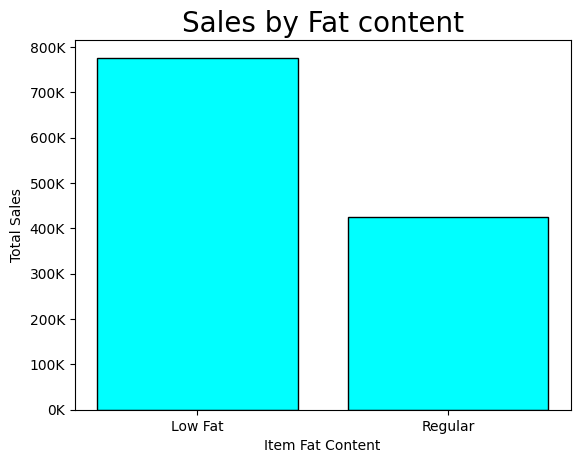

In [16]:
plt.bar(sales_by_fat.index,sales_by_fat.values,color='cyan',edgecolor='black')
vals = np.arange(0,900000,100000)
labels = ['0K','100K','200K','300K','400K','500K','600K','700K','800K']
plt.yticks(vals,labels)
plt.title('Sales by Fat content',fontdict = {
    'fontsize':20,
    'fontweight':5
})
plt.xlabel('Item Fat Content')
plt.ylabel('Total Sales')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

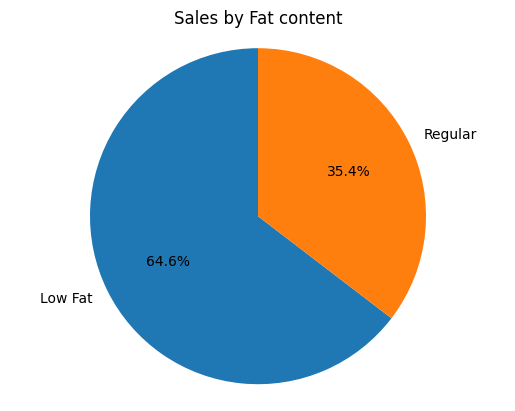

In [17]:
plt.pie(sales_by_fat.values,labels=sales_by_fat.index,
        startangle=90,autopct='%.1f%%')
plt.title('Sales by Fat content')
plt.axis('equal')
plt.show

#### **Total sales by item type**

In [18]:
sales_by_item = df.groupby('Item Type')['Sales'].sum().sort_values(ascending=False)
sales_by_item

Item Type
Fruits and Vegetables    178124.0810
Snack Foods              175433.9204
Household                135976.5254
Frozen Foods             118558.8814
Dairy                    101276.4596
Canned                    90706.7270
Baking Goods              81894.7364
Health and Hygiene        68025.8388
Meat                      59449.8638
Soft Drinks               58514.1650
Breads                    35379.1198
Hard Drinks               29334.6766
Others                    22451.8916
Starchy Foods             21880.0274
Breakfast                 15596.6966
Seafood                    9077.8700
Name: Sales, dtype: float64

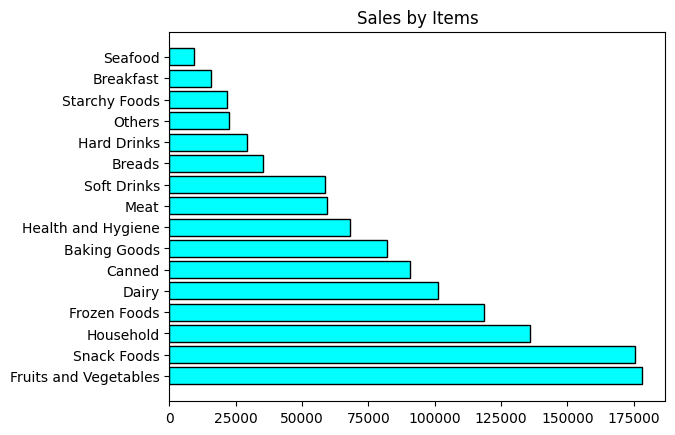

In [19]:
plt.barh(sales_by_item.index,sales_by_item.values,color='cyan',edgecolor='black')
plt.title('Sales by Items')
plt.show()

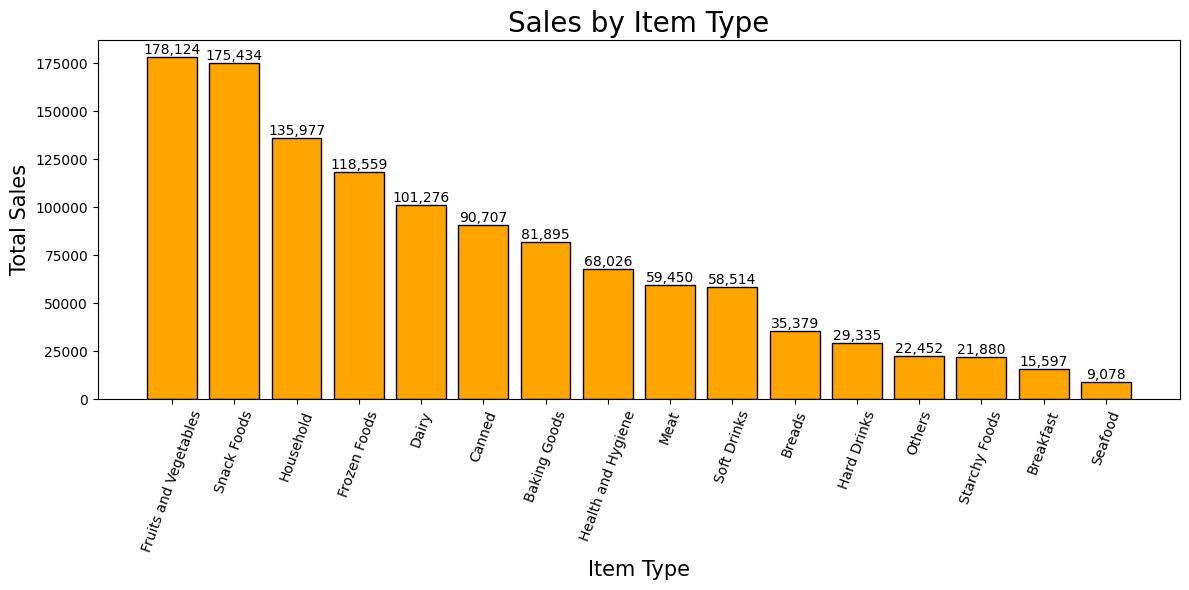

In [20]:
plt.figure(figsize=(12,6))
bars = plt.bar(sales_by_item.index,sales_by_item.values,color='orange',edgecolor='black')
plt.title('Sales by Item Type',fontdict = {
    'fontsize':20,
    'fontweight':5
})
plt.xlabel('Item Type',fontdict={'fontsize':15})
plt.ylabel('Total Sales',fontdict={'fontsize':15})
plt.xticks(rotation=70)

for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
            f'{bar.get_height():,.0f}',ha='center',va='bottom')
plt.tight_layout()
plt.show()

#### **Sales by Outlet Location**

In [46]:
tier = df.groupby('Outlet Location Type')['Sales'].sum()
tier

Outlet Location Type
Tier 1    336397.8120
Tier 2    393150.6416
Tier 3    472133.0272
Name: Sales, dtype: float64

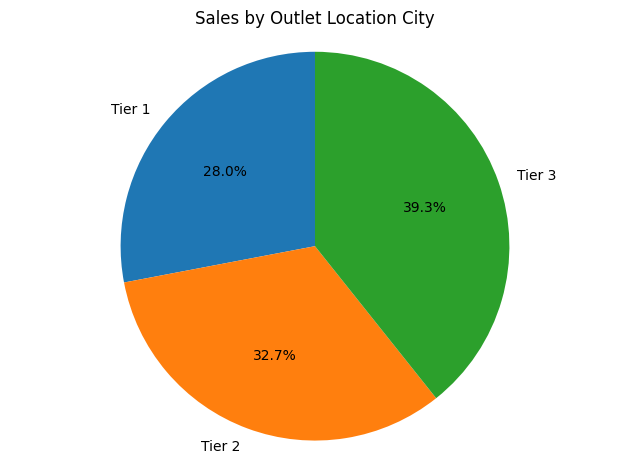

In [48]:
plt.pie(tier,labels=tier.index,startangle=90,autopct='%.1f%%')
plt.axis('equal')
plt.title('Sales by Outlet Location City')
plt.tight_layout()
plt.show()

In [21]:
group = df.groupby(['Outlet Location Type','Item Fat Content'])['Sales'].sum().unstack()
group

Item Fat Content,Low Fat,Regular
Outlet Location Type,,
Tier 1,215047.9126,121349.8994
Tier 2,254464.7734,138685.8682
Tier 3,306806.9924,165326.0348


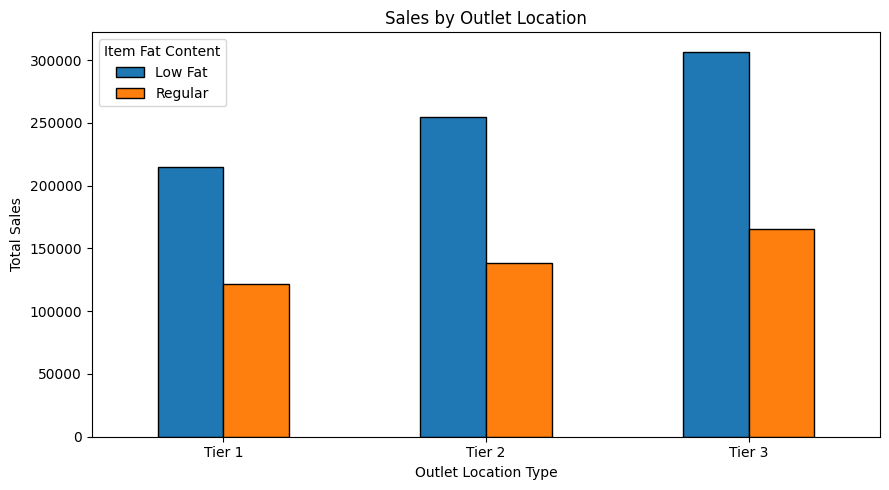

In [22]:
ax = group.plot(kind='bar',figsize=(9,5),edgecolor='black')
plt.title('Sales by Outlet Location')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

#### **Sales by Establishment Year of Outlets**

In [23]:
year = df.groupby('Outlet Establishment Year')['Sales'].sum().sort_index()
year

Outlet Establishment Year
1998    204522.2570
2000    131809.0156
2010    132113.3698
2011     78131.5646
2012    130476.8598
2015    130942.7782
2017    133103.9070
2020    129103.9564
2022    131477.7724
Name: Sales, dtype: float64

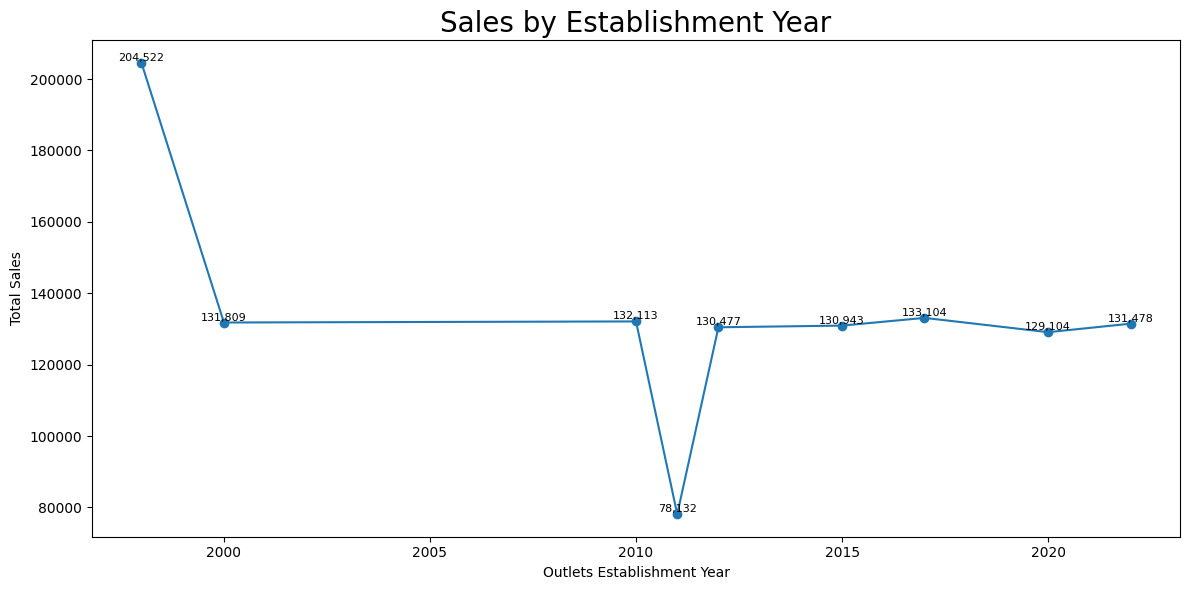

In [24]:
plt.figure(figsize=(12,6))
plt.plot(year.index,year.values,marker='o',linestyle='-')
plt.xlabel('Outlets Establishment Year')
plt.ylabel('Total Sales')
plt.title('Sales by Establishment Year',fontdict={'fontsize':20})

for x,y in zip(year.index,year.values):
    plt.text(x,y,f'{y:,.0f}',ha='center',va='bottom',fontsize=8)
plt.tight_layout()
plt.show()

#### **Sales by Outlet Size**

In [25]:
size = df.groupby('Outlet Size')['Sales'].sum()
size

Outlet Size
High      248991.5840
Medium    507895.7284
Small     444794.1684
Name: Sales, dtype: float64

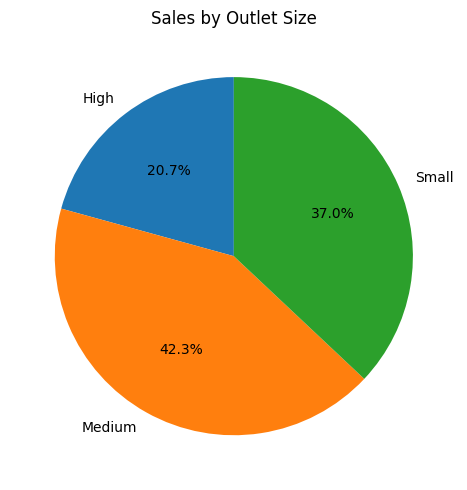

In [26]:
plt.figure(figsize=(5,5))
plt.pie(size,labels = size.index,autopct='%.1f%%',startangle=90)
plt.title('Sales by Outlet Size')
plt.tight_layout()
plt.show()

#### **Item Sales by Fat Content**

In [37]:
item_fat = df.groupby(['Item Type','Item Fat Content'])['Sales'].sum().unstack()
item_fat

Item Fat Content,Low Fat,Regular
Item Type,,
Baking Goods,39653.0108,42241.7256
Breads,18841.5058,16537.6140
Breakfast,6775.6466,8821.0500
Canned,47587.4086,43119.3184
Dairy,61494.4832,39781.9764
Frozen Foods,62558.7706,56000.1108
Fruits and Vegetables,86031.5834,92092.4976
Hard Drinks,29334.6766,NaN
Health and Hygiene,68025.8388,NaN


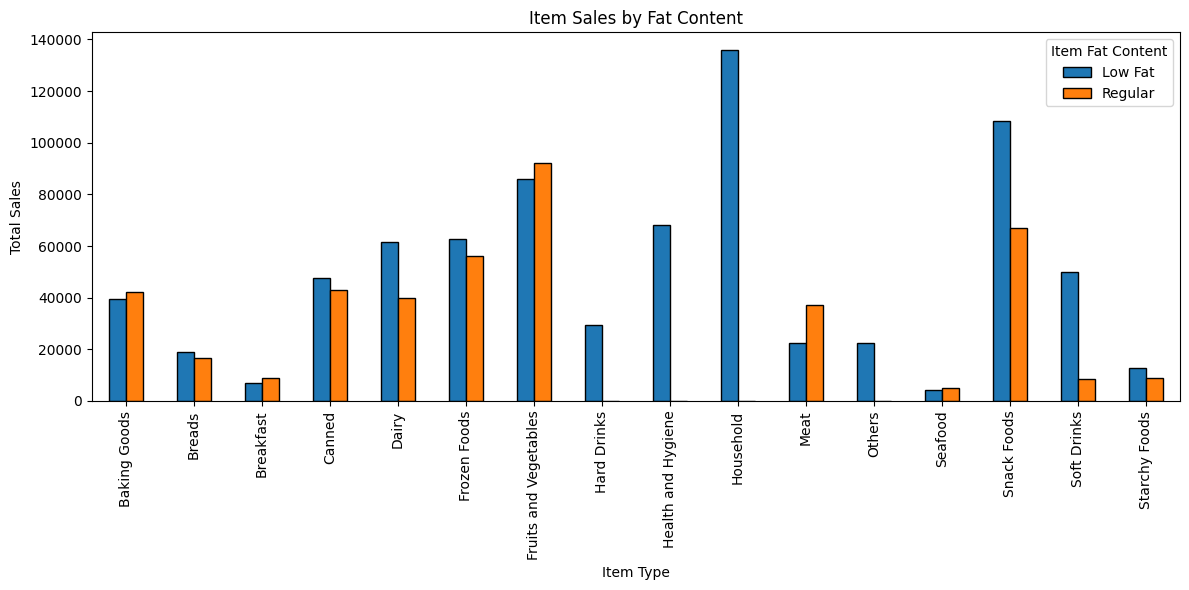

In [44]:
item_fat.plot(kind='bar',title='Item Sales by Fat Content',edgecolor='black',figsize=(12,6))
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()